In [185]:
import pandas as pd
import gensim.downloader as api
import nltk 
from nltk.corpus import stopwords
import pprint
import sklearn.cluster 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans




We already know what the pandas and nltk libraries can be used for, but this week we are interested in gensim.

# So What's Gensim?

Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. It includes a number of algorithms for unsupervised and supervised learning. It is designed to handle large text collections, and to scale to multiple cores and machines. 

# Why do we need it?

We need it because it is a library that is used to create word embeddings. Word embeddings are a way of representing words as vectors. The vectors are learned from text and are based on the words that surround the target word. The position of a word in the document is called its context. The vectors are learned in such a way that words that have similar meanings will have similar representations. Understanding how words are related is important for a number of natural language processing tasks.


In [212]:
# Load the dataset 
data = pd.read_csv('https://raw.githubusercontent.com/JVCarmich0959/CSC228/main/WUG_Mall_improvement.csv', usecols=[0,1,2])
data.head()


,Source,Label,Sentence
0,Facebook,0,Anything but another damn shoe store.
1,Facebook,1,The mall is a joke. When I worked there 30+ ye...
2,Facebook,1,A Spencer’s
3,Facebook,1,Arcade for kids and teens that serves food whe...
4,Facebook,1,"Dillards, Talbots, Chico’s."


In [213]:

# convert the data to a list of lists of words
data_list = data['Sentence'].tolist()

# create a corpus of words

# convert to string
data['Sentence'] = data['Sentence'].astype(str)

# Clean the data by removing punctuation and converting to lowercase
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','').str.lower()
data.head()

# Remove stopwords
stop = stopwords.words('english')
data['Sentence'] = data['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


# convert the data to a list of lists of words
data_list = data['Sentence'].tolist()
data_list = [nltk.word_tokenize(sent) for sent in data_list]

# create a corpus of words
mall_corpus = []
for sent in data_list:
    mall_corpus.extend(sent)


# Let's look at the most common words in the corpus
from collections import Counter
most_common_words = Counter(mall_corpus).most_common(10)

pprint.pprint(most_common_words,compact=True)








[('mall', 110), ('always', 23), ('place', 22), ('great', 21), ('store', 18),
 ('food', 16), ('stores', 16), ('like', 15), ('love', 15), ('find', 15)]


/var/folders/qr/f_knzyqd5c7gg91t6rm8sfb00000gn/T/ipykernel_67862/3268841083.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','').str.lower()


# Word2vec

## What the heck is word2vec?

**Word2Vec** is a technique for natural language processing (NLP) that allows us to convert words into vectors. These vectors are dense, continuous, and low-dimensional. This means that words that are similar in meaning will have similar vectors. This is a very powerful technique that can be used for a variety of NLP tasks.

* **clustering** : grouping similar words together
* **sentiment analysis** : determining whether a sentence is positive or negative
* **topic modeling** : determining what a document is about


## What is a vector?

A vector is a quantity that has both magnitude and direction. For example, the vector (3, 4) has a magnitude of 5 and a direction of 53.13 degrees. The vector (3, 4) is different from the vector (4, 3) because they have different magnitudes and directions.

## What is a word embedding?

A word embedding is a vector representation of a word. Word embeddings are dense, continuous, and low-dimensional. 



In [246]:
# Load the pre-trained word2vec model
model = api.load("word2vec-google-news-300")



Using K-Means Clustering: Once you have the word embeddings for your dataset, you can use K-Means clustering to group similar words together. This can be a useful technique for identifying clusters of related words in your data. 

/Users/jvcarmichael94/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


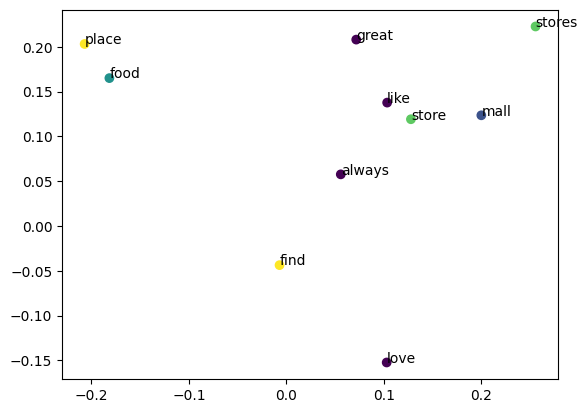

In [247]:
# Set the number of clusters
num_clusters = 5

# Create a K-Means model with the specified number of clusters
kmeans_model = KMeans(n_clusters=num_clusters)

# Fit the model to the word vectors
kmeans_model.fit(word_vectors)

# Get the cluster assignments for each word
cluster_assignments = kmeans_model.labels_

# Create a dictionary that maps each word to its cluster assignment
word_clusters = {}
for i, word in enumerate([w for w, f in most_common_words]):
    word_clusters[word] = cluster_assignments[i]

# Create a scatter plot of the word vectors, colored by cluster assignment
x_coords = [v[0] for v in word_vectors]
y_coords = [v[1] for v in word_vectors]
plt.scatter(x_coords, y_coords, c=cluster_assignments)

# Add labels for each point
for i, word in enumerate([w for w, f in most_common_words]):
    plt.annotate(word, xy=(x_coords[i], y_coords[i]))
    
plt.show()


# Visualizing our Most Common words in 3 Dimensions

I wanted to look at the most common words in our mall corpus and see how closely the related to one another in a self-referential context. 

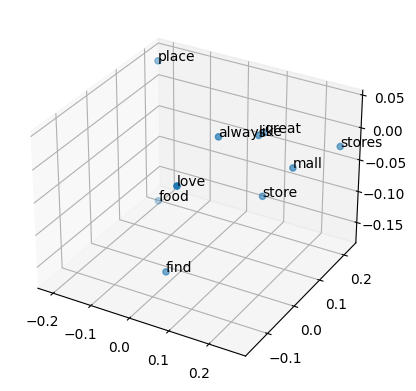

In [248]:
from sklearn.manifold import TSNE # t-distributed stochastic neighbor embedding
from mpl_toolkits.mplot3d import Axes3D # 3D plotting

# Create a t-SNE model with 3 dimensions
tsne_model = TSNE(n_components=3, random_state=42)

# Convert the list of word vectors to a NumPy array
word_vectors_np = np.array(word_vectors)

# Get the shape of the word vectors array
num_points, num_dimensions = word_vectors_np.shape

# Create a scatter plot of the word vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_coords = [v[0] for v in word_vectors] # x-coordinates of the word vectors
y_coords = [v[1] for v in word_vectors] # y-coordinates of the word vectors
z_coords = [v[2] for v in word_vectors]

ax.scatter(x_coords, y_coords, z_coords)

# Add labels for each point
for i, word in enumerate([w for w, f in most_common_words]):
    ax.text(x_coords[i], y_coords[i], z_coords[i], word)
    
plt.show()


/var/folders/qr/f_knzyqd5c7gg91t6rm8sfb00000gn/T/ipykernel_67862/1829974431.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(norm=None, cmap=cmap))


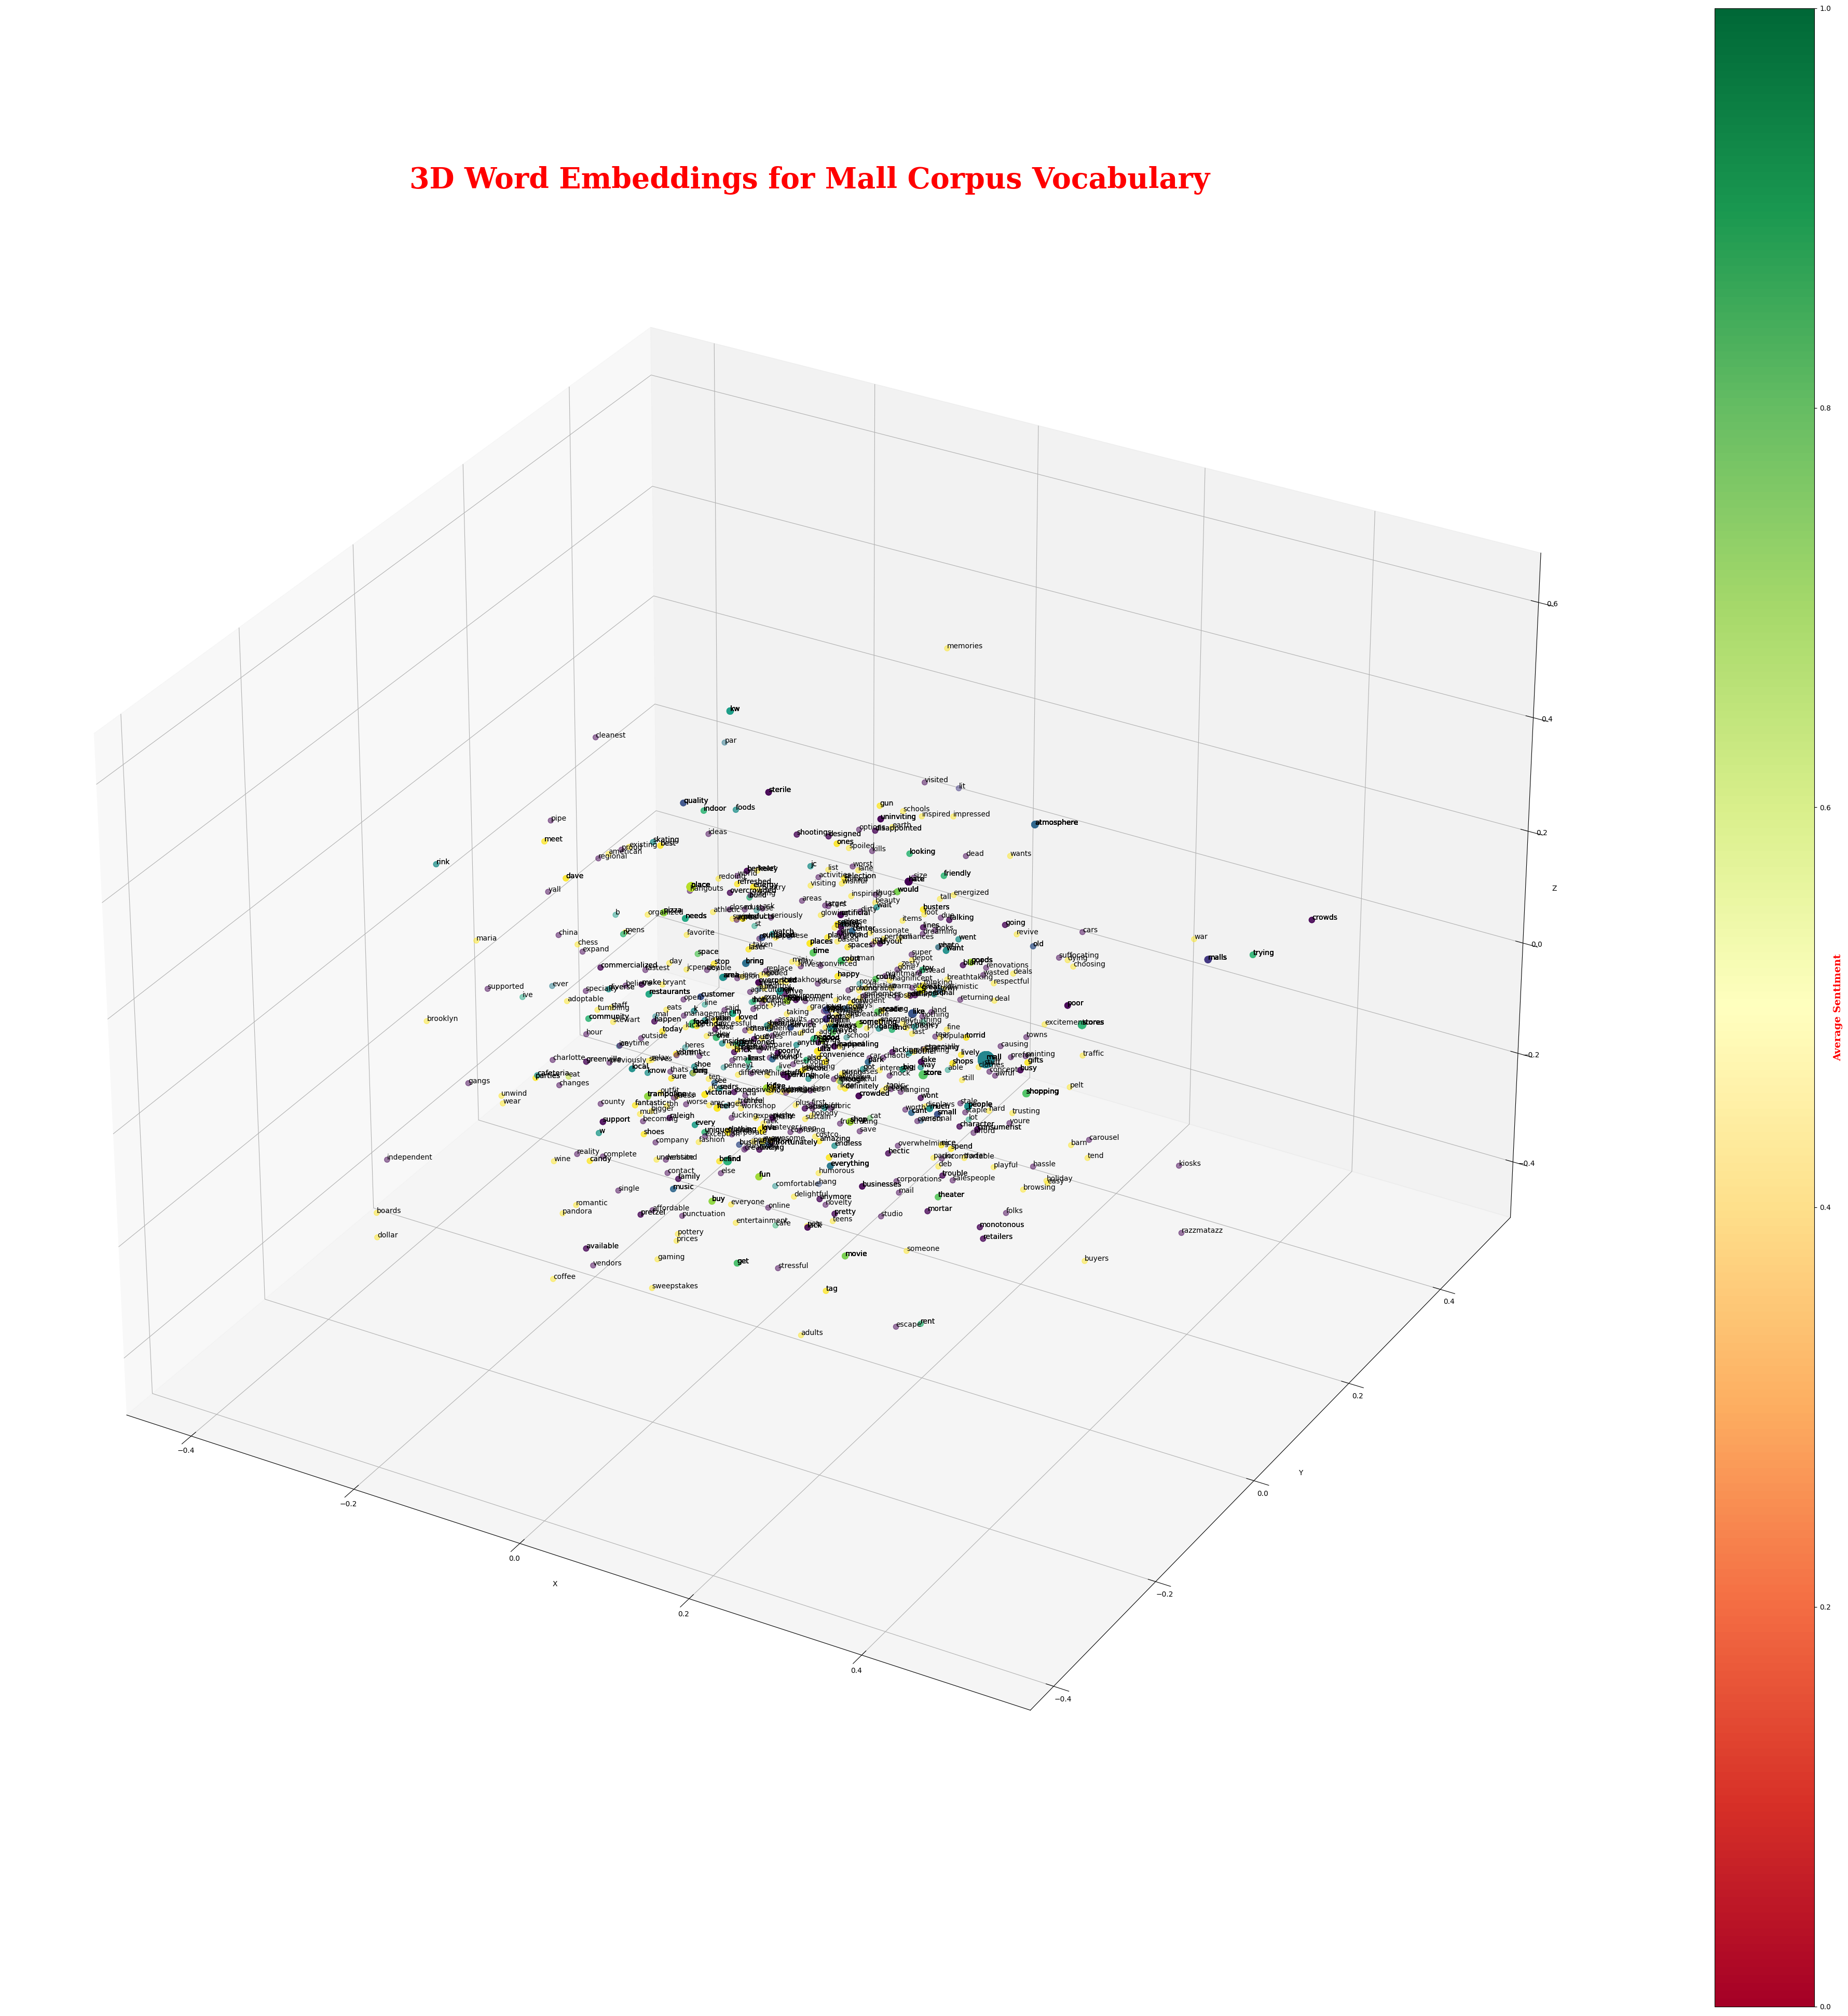

In [295]:
from matplotlib import cm

# Get the word frequencies for the mall corpus
word_frequencies = Counter(mall_corpus)

# Create a list of words in the mall corpus that are present in the Word2Vec model
mall_corpus_words = [word for word in mall_corpus if word in all_words]

# Get the word vectors for the mall corpus words that are present in the model
mall_corpus_vectors = [model[word] for word in mall_corpus_words]

# Get the sentiment labels for each comment containing a mall corpus word
sentiment_labels = [data.loc[data['Sentence'].str.contains(word), 'Label'].mean() for word in mall_corpus_words]

# Normalize the sentiment labels to be between 0 and 1
sentiment_labels_norm = [(s + 1) / 2 for s in sentiment_labels]

# Get the word frequencies for the mall corpus words
mall_corpus_sizes = [word_frequencies[word] for word in mall_corpus_words]

# Normalize the sizes to be between 50 and 500
mall_corpus_sizes_norm = [50 + 450 * (s / max(mall_corpus_sizes)) for s in mall_corpus_sizes]

# Create a scatter plot of the word vectors
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111, projection='3d')

x_coords = [v[0] for v in mall_corpus_vectors]
y_coords = [v[1] for v in mall_corpus_vectors]
z_coords = [v[2] for v in mall_corpus_vectors]

ax.scatter(x_coords, y_coords, z_coords, c=sentiment_labels_norm, s=mall_corpus_sizes_norm, alpha=0.5)

# Add labels for each point
for i, word in enumerate(mall_corpus_words):
    x = x_coords[i]
    y = y_coords[i]
    z = z_coords[i]
    ax.text(x, y, z, word, fontsize=10)

# Add a color bar
cmap = cm.get_cmap('RdYlGn')
cbar = plt.colorbar(cm.ScalarMappable(norm=None, cmap=cmap))
cbar.ax.set_ylabel('Average Sentiment', fontsize=14, fontweight='bold', fontfamily='serif', color='red')

# Add axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Word Embeddings for Mall Corpus Vocabulary', fontsize=40, pad=20, fontweight='bold', fontfamily='serif', color='red')

plt.show()


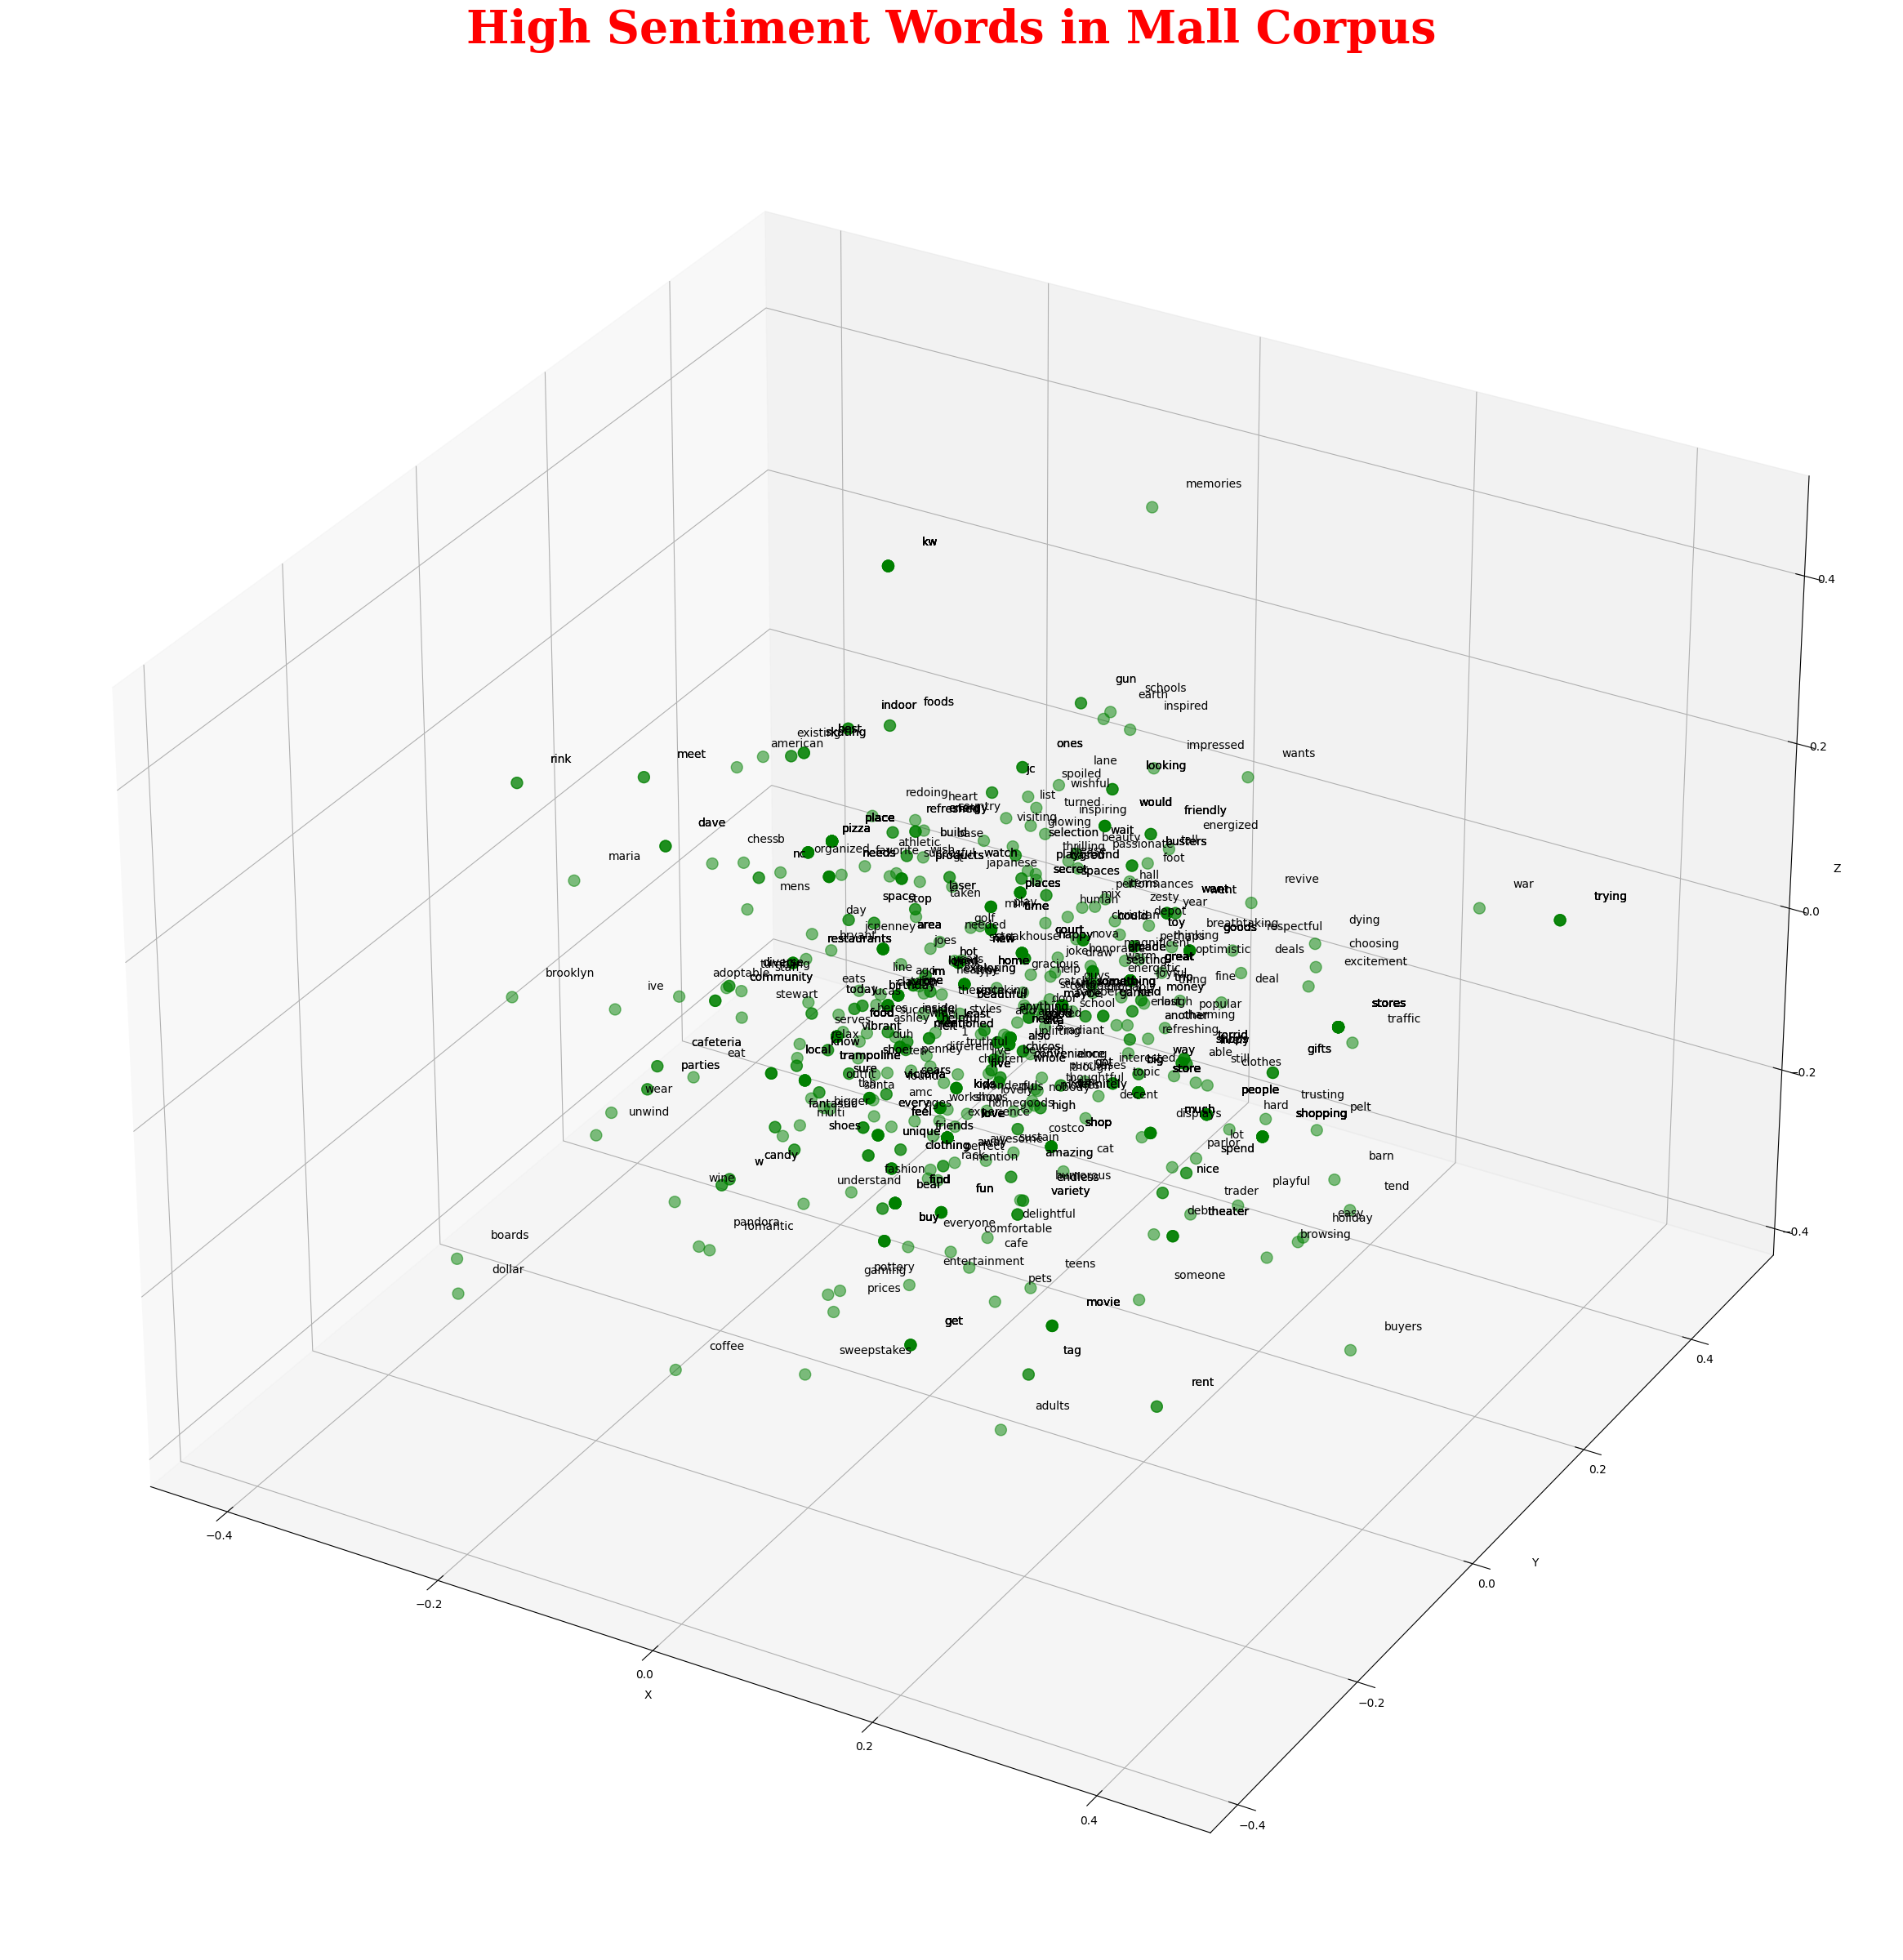

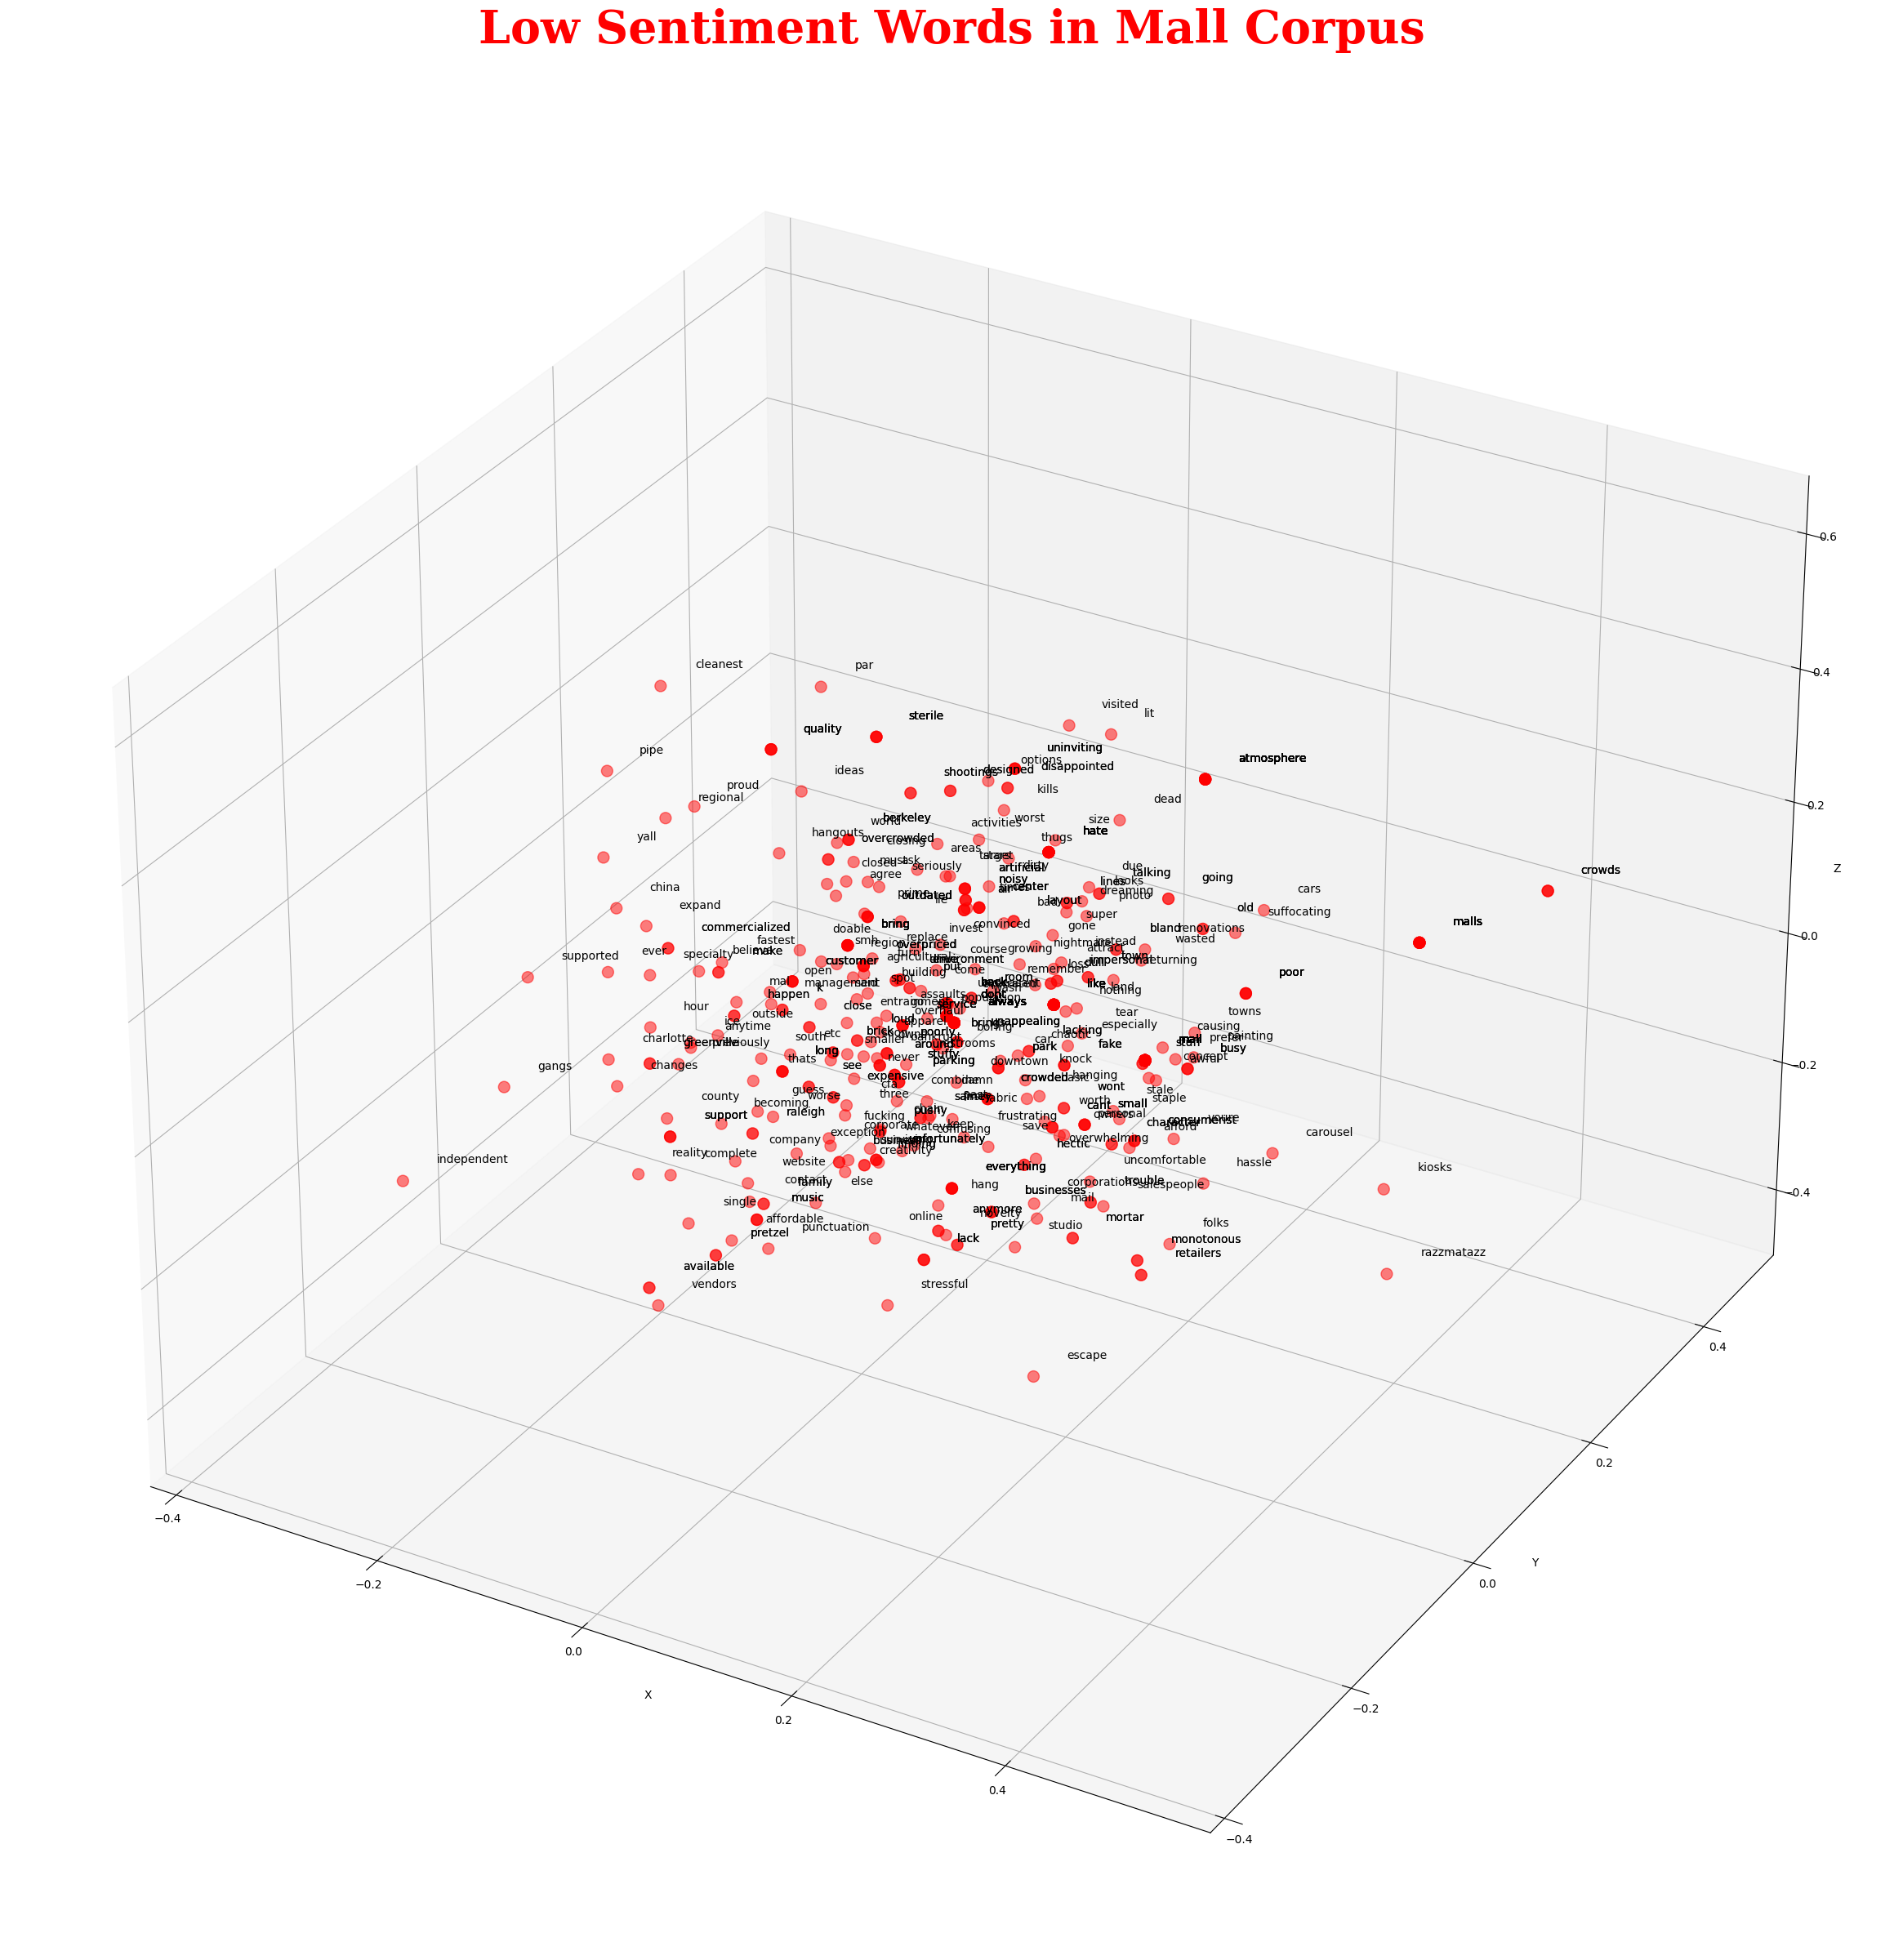

In [267]:
# Get the word frequencies for the mall corpus
word_frequencies = Counter(mall_corpus)

# Create a list of words in the mall corpus that are present in the Word2Vec model
mall_corpus_words = [word for word in mall_corpus if word in all_words]

# Get the sentiment labels for each comment containing a mall corpus word
sentiment_labels = [data.loc[data['Sentence'].str.contains(word), 'Label'].mean() for word in mall_corpus_words]

# Split the words into two lists based on sentiment
high_sentiment_words = [word for i, word in enumerate(mall_corpus_words) if sentiment_labels[i] >= 0.5]
low_sentiment_words = [word for i, word in enumerate(mall_corpus_words) if sentiment_labels[i] < 0.5]

# Get the word vectors for the high sentiment words
high_sentiment_vectors = [model[word] for word in high_sentiment_words]

# Get the word vectors for the low sentiment words
low_sentiment_vectors = [model[word] for word in low_sentiment_words]

# Create a scatter plot of the high sentiment words
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

x_coords = [v[0] for v in high_sentiment_vectors]
y_coords = [v[1] for v in high_sentiment_vectors]
z_coords = [v[2] for v in high_sentiment_vectors]

ax.scatter(x_coords, y_coords, z_coords, c='green', s=100, alpha=0.5)

# Add labels for each point
for i, word in enumerate(high_sentiment_words):
    x = x_coords[i]
    y = y_coords[i]
    z = z_coords[i]
    ax.text(x+0.02, y+0.02, z+0.02, word, fontsize=10)

# Add axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('High Sentiment Words in Mall Corpus', fontsize=40, pad=20, fontweight='bold', fontfamily='serif', color='red')

plt.show()

# Create a scatter plot of the low sentiment words
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

x_coords = [v[0] for v in low_sentiment_vectors]
y_coords = [v[1] for v in low_sentiment_vectors]
z_coords = [v[2] for v in low_sentiment_vectors]

ax.scatter(x_coords, y_coords, z_coords, c='red', s=100, alpha=0.5)

# Add labels for each point
for i, word in enumerate(low_sentiment_words):
    x = x_coords[i]
    y = y_coords[i]
    z = z_coords[i]
    ax.text(x+0.02, y+0.02, z+0.02, word, fontsize=10)

# Add axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Low Sentiment Words in Mall Corpus', fontsize=40, pad=20, fontweight='bold', fontfamily='serif', color='red')

plt.show()


# GloVE Word Embeddings

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

Let's see how we can use GloVe to create word embeddings for our mall corpus:




In [275]:
# load in the glove-wiki-gigaword-50 model from gensim 
# commonly used for small scale NLP tasks such as sentiment analysis
glove_model = api.load('glove-wiki-gigaword-50')
pprint.pprint(glove_model.most_similar('king'))


[('prince', 0.8236179351806641),
 ('queen', 0.7839044332504272),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542160749435425),
 ('throne', 0.7539914846420288),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434254288673401)]


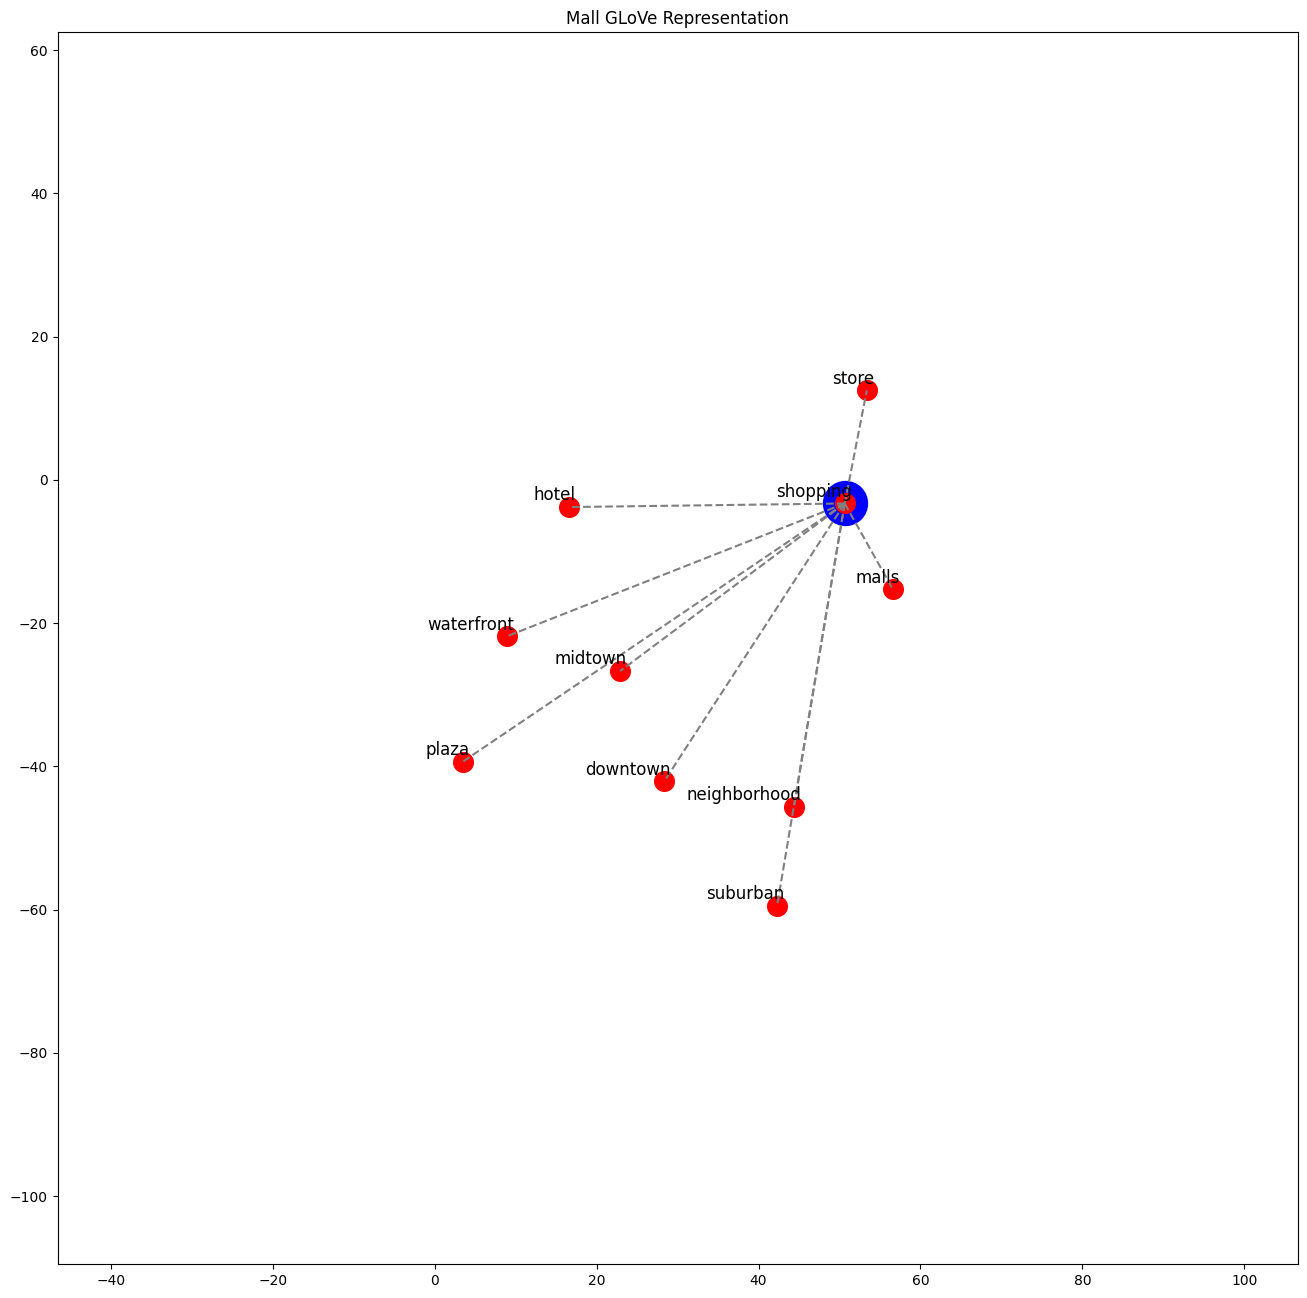

In [297]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Get the embeddings for the words
king_vec = glove_model['mall']
similar_words = [word for word, _ in glove_model.most_similar('mall')]
similar_words_vecs = [glove_model[word] for word in similar_words]

# Convert the vectors to a numpy array
similar_words_vecs = np.array(similar_words_vecs)

# Reduce the number of samples to fit the perplexity requirements
similar_words_vecs = similar_words_vecs[:1000]

# Create a TSNE model and fit the model to the vectors
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000, random_state=23)
new_values = tsne_model.fit_transform(similar_words_vecs)

# Create a scatter plot of the word vectors
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

# Set the figure size and create the plot
plt.figure(figsize=(16, 16))
plt.title("Mall GLoVe Representation")

# plot king in blue
plt.scatter(x[0], y[0], color='b', marker='o', s=1000)

# Plot the similar words and connect them with lines
for i in range(len(x)):
    if similar_words[i] == 'mall':
        plt.scatter(x[i], y[i], color='b', marker='o', s=1000)
        plt.annotate(similar_words[i], xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=16, fontweight='bold')
    else:
        plt.scatter(x[i], y[i], color='r', marker='o', s=200)
        plt.annotate(similar_words[i], xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=12)
        plt.plot([x[0], x[i]], [y[0], y[i]], color='gray', linestyle='--')

# Set the axis limits and show the plot
plt.xlim(min(x)-50, max(x)+50)
plt.ylim(min(y)-50, max(y)+50)
plt.show()


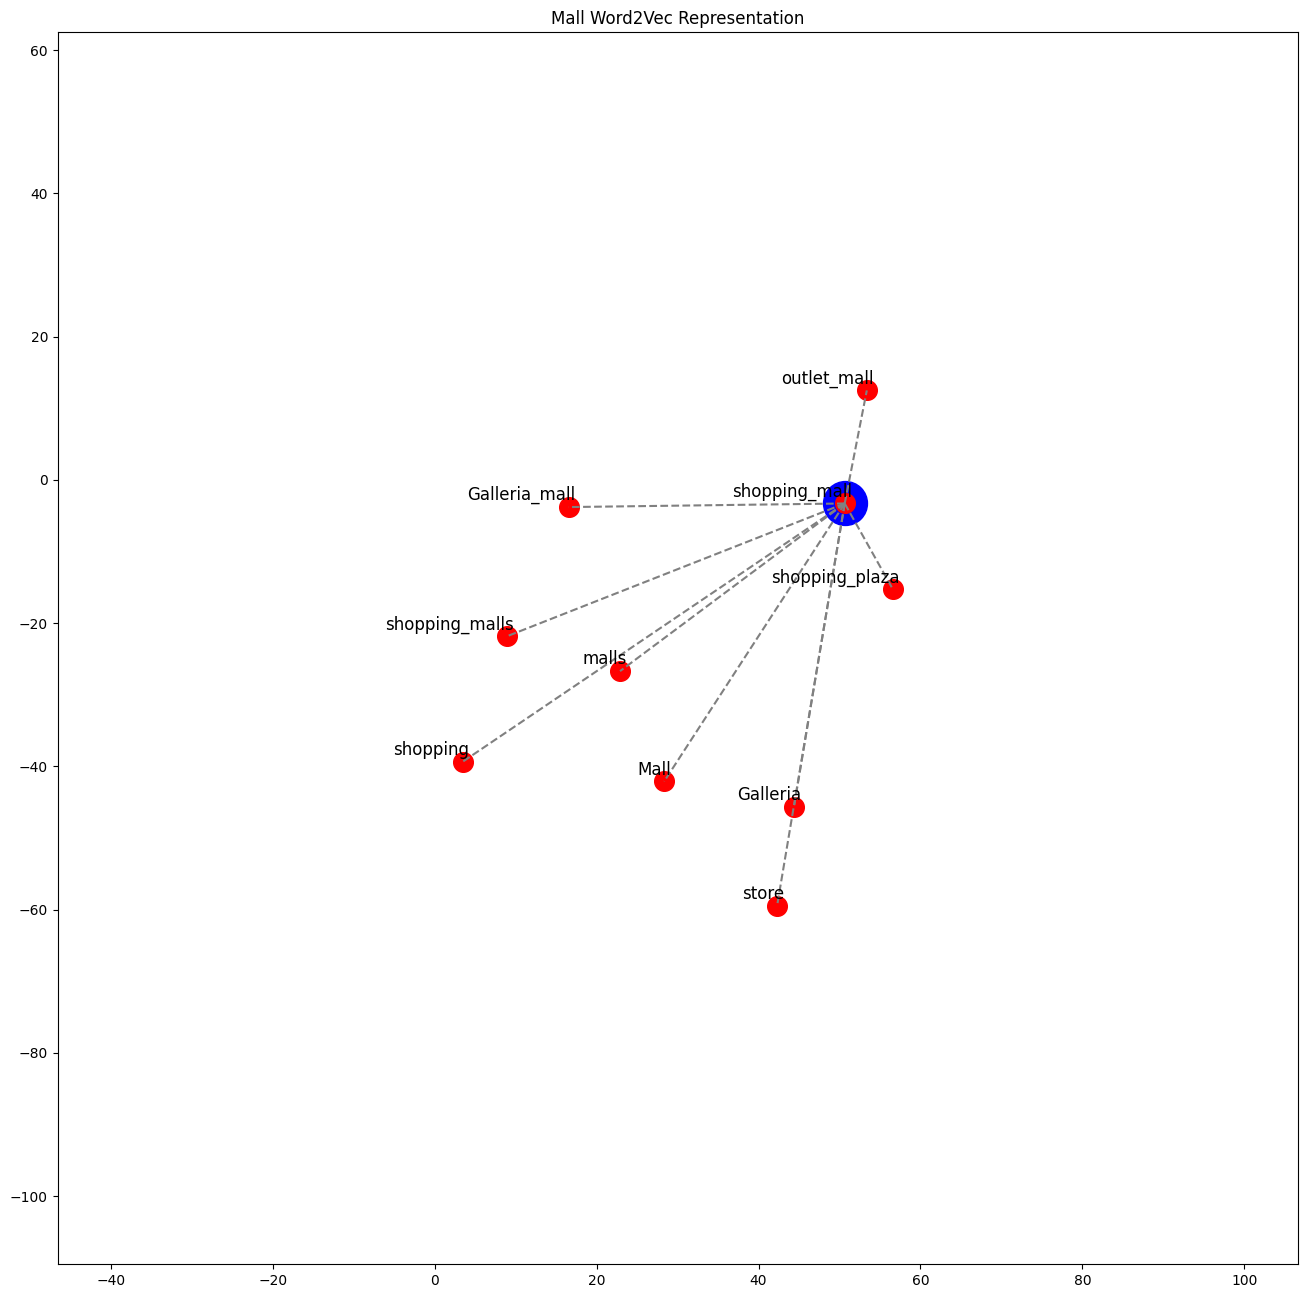

In [294]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Get the embeddings for the words
mall_vec = model['mall','store','shop']
similar_words_2 = [word for word, _ in model.most_similar('mall')]
similar_words_vecs_2 = [model[word] for word in similar_words]

# Convert the vectors to a numpy array
similar_words_vecs_2 = np.array(similar_words_vecs_2)

# Reduce the number of samples to fit the perplexity requirements
similar_words_vecs_2 = similar_words_vecs_2[:1000]

# Create a TSNE model and fit the model to the vectors
tsne_model_2 = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000, random_state=23)
new_values_2 = tsne_model_2.fit_transform(similar_words_vecs_2)

# Create a scatter plot of the word vectors
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

# Set the figure size and create the plot
plt.figure(figsize=(16, 16))
plt.title("Mall Word2Vec Representation")

# plot king in blue
plt.scatter(x[0], y[0], color='b', marker='o', s=1000)

# Plot the similar words and connect them with lines
for i in range(len(x)):
    if similar_words_2[i] == 'mall':
        plt.scatter(x[i], y[i], color='b', marker='o', s=1000)
        plt.annotate(similar_words_2[i], xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=16, fontweight='bold')
    else:
        plt.scatter(x[i], y[i], color='r', marker='o', s=200)
        plt.annotate(similar_words_2[i], xy=(x[i], y[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=12)
        plt.plot([x[0], x[i]], [y[0], y[i]], color='gray', linestyle='--')

# Set the axis limits and show the plot
plt.xlim(min(x)-50, max(x)+50)
plt.ylim(min(y)-50, max(y)+50)
plt.show()


# Comparing the two models

We can see that the GloVe model is able to capture the relationships between the words in our corpus better than the word2vec model. This is because GloVe is trained on a much larger corpus of text.

It looks like word2vec is a bit more literal in its interpretation of the words. For example, the word "mall" is closer to "shopping" than "mall" is to "shopping" in the GloVe model. This is because the word2vec model is trained on a much smaller corpus of text.

# Conclusion

In this notebook, we learned how to create word embeddings using the word2vec and GloVe models. We also learned how to visualize the word embeddings in 3 dimensions using PCA. We also learned how to use K-Means clustering to group similar words together.

# References

* https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial
* https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
